# Unsupervised Learning

* Clustering
  - K-means: Seperate to K-numbered categories,  
    Minimize the Square-Mean Loss of Clusters and Distance.
  - Hierarchial Clustering: 
* Evaluation
  - Silhouette

## Preparation

In [1]:
import os
from os.path import join
import copy

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

## Load Dataset

### Load Wine Dataset

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
data = wine.data # columns
label = wine.target # label
columns = wine.feature_names # features

### Convert to DataFrame

In [5]:
data = pd.DataFrame(data, columns = columns)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Get Dimensions of DataFrame

In [6]:
data.shape

(178, 13)

### Get Descriptive Statistics

In [7]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Pandas Info

In [8]:
data.info()
# Check data is clean: contains no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


## K-means
get random point as center of the category. 
get average everything inside the category, set it as center of the category, re-draw the borders

### PCA

In [9]:
# PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 13 -> 2 
data = pca.fit_transform(data)

In [11]:
data.shape # 13 -> 2

(178, 2)

### Training

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3) # How many Clusters?
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Cluster Allocation Via Prediction

In [13]:
cluster = kmeans.predict(data) 

### Visualization

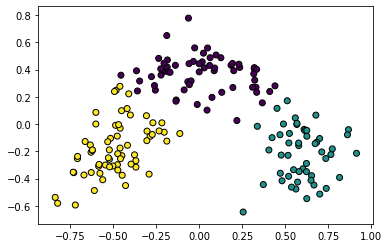

In [14]:
plt.scatter(data[:, 0], data[:, 1], c=cluster, linewidth=1, edgecolor='black')
plt.show()

## Hierarchial Clustering

### Average Linkage

In [16]:
from sklearn.cluster import AgglomerativeClustering
average_clustering = AgglomerativeClustering(linkage='average', n_clusters=3)

#### Training

In [17]:
average_clustering.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [18]:
average_cluster = average_clustering.labels_
average_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

#### Visualization

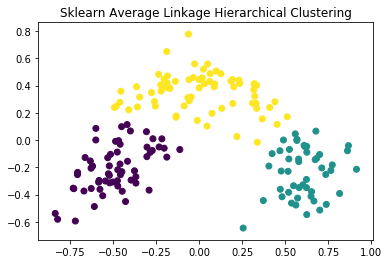

In [19]:
plt.scatter(data[:,0], data[:,1], c=average_cluster)
plt.title('Sklearn Average Linkage Hierarchical Clustering')
plt.show()

#### Evaluation
Dendrogram

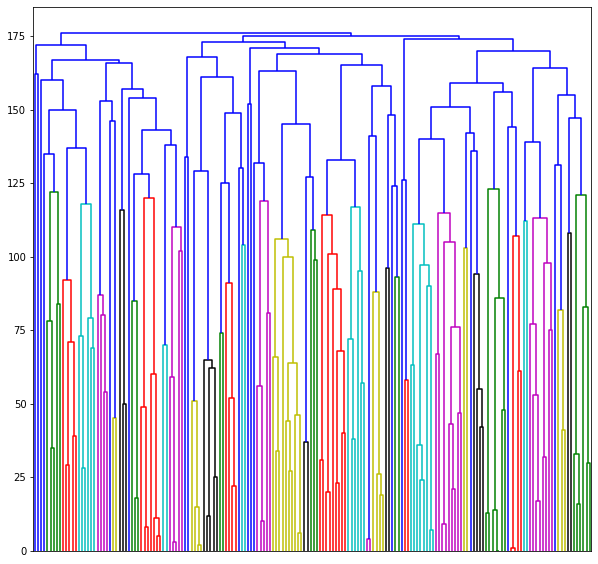

In [20]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10,10))

# Hierarchical Clustering의 자식 노드
children = average_clustering.children_

# 각 자식 노드간의 거리 정보를 가지고 있지 않기 때문에, 균일하게 그리도록 합니다.
distance = np.arange(children.shape[0])

# 각 클러스터 단계를 포함한 노드의 수 계산
no_of_observations = np.arange(2, children.shape[0]+2)

# 덴드로그램을 그리기위한 연결 매트릭스를 생성합니다.
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

# 덴드로그램을 그립니다.
dendrogram(linkage_matrix, p = len(data), labels = average_cluster, 
           show_contracted=True, no_labels = True, )
plt.show()

## Evaluation

#### Silhouette - KMeans

In [21]:
from sklearn.metrics import silhouette_score

best_n = 1
best_score = -1

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(data)
    cluster = kmeans.predict(data)
    score = silhouette_score(data, cluster)
    
    print('Cluster No.: {}, Silhouette: {:.2f}'.format(n_cluster, score))
    if score > best_score :
        best_n = n_cluster
        best_score = score
        
print('Best Cluster No with max Silhouette: {}, Silhouette Point: {:.2f}'.format(best_n, best_score))

Cluster No.: 2, Silhouette: 0.49
Cluster No.: 3, Silhouette: 0.57
Cluster No.: 4, Silhouette: 0.49
Cluster No.: 5, Silhouette: 0.46
Cluster No.: 6, Silhouette: 0.40
Cluster No.: 7, Silhouette: 0.39
Cluster No.: 8, Silhouette: 0.39
Cluster No.: 9, Silhouette: 0.39
Cluster No.: 10, Silhouette: 0.39
Best Cluster No with max Silhouette: 3, Silhouette Point: 0.57


#### Silhouette - Average Clustering

In [22]:
from sklearn.metrics import silhouette_score

best_n = 1
best_score = -1

for n_cluster in range(2, 11):
    average_clustering = AgglomerativeClustering(n_clusters=n_cluster, linkage='average')
    average_clustering.fit(data)
    cluster = average_clustering.labels_
    score = silhouette_score(data, cluster)
    
    print('Cluster No.: {}, Silhouette: {:.2f}'.format(n_cluster, score))
    if score > best_score :
        best_n = n_cluster
        best_score = score
        
print('Best Cluster No with max Silhouette: {}, Silhouette Point: {:.2f}'.format(best_n, best_score))

Cluster No.: 2, Silhouette: 0.49
Cluster No.: 3, Silhouette: 0.56
Cluster No.: 4, Silhouette: 0.48
Cluster No.: 5, Silhouette: 0.42
Cluster No.: 6, Silhouette: 0.37
Cluster No.: 7, Silhouette: 0.34
Cluster No.: 8, Silhouette: 0.34
Cluster No.: 9, Silhouette: 0.37
Cluster No.: 10, Silhouette: 0.33
Best Cluster No with max Silhouette: 3, Silhouette Point: 0.56
